<h1 align='center'>FOML ASSIGNMENT-9</h1>



---


###Samarth Motka
###202311023


---



##Consider the Iris dataset with sepal length and sepal width as the attributes,and Iris-Setosa as class c1, and the other two Iris types as class c2. There are n1= 50 points in c1 and n2 = 100 points in c2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.datasets import load_iris
drive.mount('/content/drive')

Mounted at /content/drive


###A. Find the optimal linear discriminant vector w for separating the class c1 and c2

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Take only sepal length and sepal width
y = iris.target

# Separate data into classes c1 and c2
X_c1 = X[y == 0]
X_c2 = X[y != 0]

###B. Plot the data points of c1 (as circles) and c2 (as triangles) along with the optimal discriminant vector.

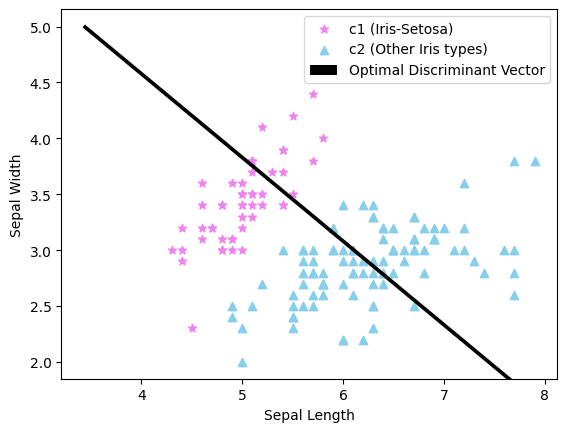

In [38]:

# Calculate mean vectors
m1 = np.mean(X_c1, axis=0)
m2 = np.mean(X_c2, axis=0)
# m = (m1-m2)**2
# Calculate within-class scatter matrix Sw
S1 = np.cov(X_c1.T)
S2 = np.cov(X_c2.T)
Sw = S1 + S2

# Calculate optimal linear discriminant vector w
w = np.linalg.inv(Sw).dot(m1-m2)

# Plot data points and optimal discriminant vector
plt.scatter(X_c1[:, 0], X_c1[:, 1], marker='*',color='violet', label='c1 (Iris-Setosa)')
plt.scatter(X_c2[:, 0], X_c2[:, 1], marker='^',color='skyblue', label='c2 (Other Iris types)')
plt.quiver(m1[1], m1[0], w[1], w[0], angles='xy', scale_units='xy', scale=1, color='black', label='Optimal Discriminant Vector')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()




###C. After learning the w, predict the class of a test flower with sepal length 0.32 and sepal width 0.62. (units of measurement are same as used in Iris dataset).



In [21]:
# Predict the class of a test flower
test_flower = np.array([0.32, 0.62])
projection = w.dot(test_flower - 0.5 * (m1 + m2))
predicted_class = 0 if projection < 0 else 1
print(f'The predicted class for the test flower is: c{predicted_class + 1}')

The predicted class for the test flower is: c2
